In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time # to measure how long the models take
from sklearn import datasets
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_excel("C:/Users/tauny/Desktop/Schulich - School/ACP/Data/Schulich MBAN - Data Sheet .xlsx")

In [3]:
data.head()

,Client ID,Survey Response Date,Survey Response Channel,NPS Score,Client First Service Date,Age,Gender,Province,High Value Client Indicator,Has Credit Card,Has Deposit Account,Has Investment Account,Has Borrowing Product,Total Product Count,Total Funds Managed,Chequing Balance,Savings Balance,Credit Card Balance,Client Attrited
0,939L4933M74330OZ,2024-02-25,Mobile,0,1985-01-17,51 to 65,F,ON,0,0,1,0,1,4,400.0,300.0,NaN,NaN,No
1,429I6439D19572YJ,2024-01-24,Online,9,1988-01-26,51 to 65,F,BC,0,1,1,1,1,7,82600.0,39700.0,200.0,0.0,No
2,920A8054B28169QO,2024-05-22,Online,9,2019-01-13,19 to 35,F,NS,0,1,1,0,0,3,15000.0,1300.0,0.0,12000.0,No
3,957H8335M34557RI,2023-12-08,Mobile,10,1998-01-03,36 to 50,F,ON,0,1,1,0,1,4,19000.0,1700.0,NaN,6500.0,No
4,490W8554J38739BQ,2024-07-29,Mobile,8,1987-01-08,81 to 85,M,NB,0,1,1,0,0,4,3500.0,1500.0,NaN,1000.0,No


In [4]:
data.describe()

,Survey Response Date,NPS Score,Client First Service Date,High Value Client Indicator,Has Credit Card,Has Deposit Account,Has Investment Account,Has Borrowing Product,Total Product Count,Total Funds Managed,Chequing Balance,Savings Balance,Credit Card Balance
count,11044,11044.000000,11044,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,1.102400e+04,10085.000000,6552.000000,9249.000000
mean,2024-03-13 19:37:08.323071232,8.533774,2002-10-27 11:22:34.726548224,0.196577,0.837468,0.935531,0.449475,0.520645,5.190148,1.126389e+05,7152.077343,10598.565324,3245.356255
min,2023-09-20 00:00:00,0.000000,1968-01-04 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,-19100.000000
25%,2023-12-06 00:00:00,8.000000,1990-01-10 00:00:00,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,4.475000e+03,400.000000,100.000000,100.000000
50%,2024-03-20 00:00:00,10.000000,2003-01-07 00:00:00,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,2.030000e+04,1900.000000,1200.000000,800.000000
75%,2024-06-20 00:00:00,10.000000,2017-01-27 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.007250e+05,6000.000000,8400.000000,3200.000000
max,2024-08-28 00:00:00,10.000000,2024-01-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.392490e+07,647100.000000,781400.000000,132100.000000
std,NaN,2.322118,NaN,0.397428,0.368955,0.245598,0.497463,0.499596,2.567722,3.381082e+05,21199.729228,31846.414714,6512.322654


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Client ID                    11044 non-null  object        
 1   Survey Response Date         11044 non-null  datetime64[ns]
 2   Survey Response Channel      11044 non-null  object        
 3   NPS Score                    11044 non-null  int64         
 4   Client First Service Date    11044 non-null  datetime64[ns]
 5   Age                          11044 non-null  object        
 6   Gender                       11044 non-null  object        
 7   Province                     11041 non-null  object        
 8   High Value Client Indicator  11044 non-null  int64         
 9   Has Credit Card              11044 non-null  int64         
 10  Has Deposit Account          11044 non-null  int64         
 11  Has Investment Account       11044 non-nu

In [6]:
 # Count missing values in each column
print(data.isnull().sum())

Client ID                         0
Survey Response Date              0
Survey Response Channel           0
NPS Score                         0
Client First Service Date         0
Age                               0
Gender                            0
Province                          3
High Value Client Indicator       0
Has Credit Card                   0
Has Deposit Account               0
Has Investment Account            0
Has Borrowing Product             0
Total Product Count               0
Total Funds Managed              20
Chequing Balance                959
Savings Balance                4492
Credit Card Balance            1795
Client Attrited                   0
dtype: int64


Missing vals = Province, Total Funds Managed, Chequing Balance, Savings Balance, Credit Card Balance

In [7]:
# Check for duplicates
print(data.duplicated().sum())

0


# ASSUMPTION IS THAT NULL VALUES REPRESENT NO ACCOUNT INSTEAD OF HAVING ACCOUNTS WITH A ZERO BALANCE. THEREFORE PRODUCT? ACCOUNT DOES NOT EXIST WITH CLIENT.
Given the null values in credit card, chequings, and savings accounts likely represent no account, filling them in with monetary amounts will not be an accurate representation because this account does not exist for these clients.
We will instead replace the null vals with 0, and create another columns indicating whether or not the client has these accounts.


MAY NEED TO ADJUST THIS PART*********    0 might be fine without a new col.

Chequing Balance, Savings Balance, and Credit Card Balance Nulls

In [8]:
# Fill null values in 'Chequing Balance', 'Savings Balance', and 'Credit Card Balance' with 0
data['Chequing Balance'] = data['Chequing Balance'].fillna(0)
data['Savings Balance'] = data['Savings Balance'].fillna(0)
data['Credit Card Balance'] = data['Credit Card Balance'].fillna(0)

# Create indicators for having each type of account
data['Has Chequing Account'] = data['Chequing Balance'].apply(lambda x: 1 if x > 0 else 0)
data['Has Savings Account'] = data['Savings Balance'].apply(lambda x: 1 if x > 0 else 0)
data['Has Credit Card Account'] = data['Credit Card Balance'].apply(lambda x: 1 if x > 0 else 0)

Province Nulls

In [9]:
# Display rows where 'Province' has missing values
missing_province_rows = data[data['Province'].isnull()]

# Show the rows
print(missing_province_rows)

             Client ID Survey Response Date Survey Response Channel  \
156   937W6753V62366MQ           2024-03-25                  Online   
659   483Y1962M50336VU           2023-11-15                  Mobile   
4892  783K3136E24774CX           2024-02-25                  Mobile   

      NPS Score Client First Service Date       Age Gender Province  \
156           6                2002-01-24  71 to 75      F      NaN   
659           9                2019-01-31  51 to 65      M      NaN   
4892          8                2018-01-01  71 to 75      M      NaN   

      High Value Client Indicator  Has Credit Card  ...  \
156                             0                1  ...   
659                             1                0  ...   
4892                            0                0  ...   

      Has Borrowing Product  Total Product Count  Total Funds Managed  \
156                       0                    3               1500.0   
659                       1                    

Since one of the 3 'Null' vals is a high value customer, and the others carry varying balances, we will replace the province with 'Unknown' to allow for further analysis and not exclude potentially important variables.

In [10]:
# Replace missing values in 'Province' with 'Unknown'
data['Province'] = data['Province'].fillna('Unknown')

Total Funds Managed Nulls
We replace null with 0 for this feature. This is because they show as having existing products - but no balances anywhere, so potentially products are now paid off or at 0.

In [11]:
# Replace null values in 'Total Funds Managed' with 0
data['Total Funds Managed'] = data['Total Funds Managed'].fillna(0)

Gender, Survey Response Channel, and Client Attrited to be converted to numerical.

In [12]:
# To determine how many different variables in the Survey Response Feature to decide whether one-hot encoding is needed, or if we can map values directly to integers.
data['Survey Response Channel'].nunique()

2

Only two options avaialble, so it can be convereted to 0 and 1 numerical values.

In [13]:
data['Survey Response Channel'].unique()

array(['Mobile', 'Online'], dtype=object)

In [14]:
# To determine how many different variables in Gender to decide whether one-hot encoding is needed, or if we can map values directly to integers.
data['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [15]:
#More than two variables, so we will encode.

In [16]:
data = pd.get_dummies(data, columns=['Gender'], prefix='Gender', drop_first=True, dtype=int)

In [17]:
data['Client Attrited'] = data['Client Attrited'].map({'Yes': 1, 'No': 0})

data['Survey Response Channel'] = data['Survey Response Channel'].map({'Mobile': 1, 'Online': 0})

Province to be one-hot encoded, numerically.

In [18]:
data = pd.get_dummies(data, columns=['Province'], drop_first=True, dtype=int)

We will one-hot encode the age categories

In [19]:
data = pd.get_dummies(data, columns=['Age'], drop_first=True, dtype=int)

In [20]:
data.head()

,Client ID,Survey Response Date,Survey Response Channel,NPS Score,Client First Service Date,High Value Client Indicator,Has Credit Card,Has Deposit Account,Has Investment Account,Has Borrowing Product,...,Province_YT,Age_19 to 35,Age_36 to 50,Age_51 to 65,Age_66 to 70,Age_71 to 75,Age_76 to 80,Age_81 to 85,Age_85+,Age_No Age
0,939L4933M74330OZ,2024-02-25,1,0,1985-01-17,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,429I6439D19572YJ,2024-01-24,0,9,1988-01-26,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,920A8054B28169QO,2024-05-22,0,9,2019-01-13,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,957H8335M34557RI,2023-12-08,1,10,1998-01-03,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,490W8554J38739BQ,2024-07-29,1,8,1987-01-08,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
data.apply(lambda col: col.sample(1).values[0])

Client ID                                   365Y1463U81832IC
Survey Response Date           2024-04-28T00:00:00.000000000
Survey Response Channel                                    0
NPS Score                                                 10
Client First Service Date      1988-01-08T00:00:00.000000000
High Value Client Indicator                                0
Has Credit Card                                            1
Has Deposit Account                                        1
Has Investment Account                                     0
Has Borrowing Product                                      0
Total Product Count                                        1
Total Funds Managed                                  11600.0
Chequing Balance                                     25000.0
Savings Balance                                          0.0
Credit Card Balance                                   3500.0
Client Attrited                                            0
Has Chequing Account    

In [22]:
# Save cleaned data
data.to_excel('cleaned.xlsx', index=False)

In [23]:
print(os.getcwd())  # Shows the current working directory

c:\Users\tauny\Desktop\Schulich - School\ACP\Model Development


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Client ID                    11044 non-null  object        
 1   Survey Response Date         11044 non-null  datetime64[ns]
 2   Survey Response Channel      11044 non-null  int64         
 3   NPS Score                    11044 non-null  int64         
 4   Client First Service Date    11044 non-null  datetime64[ns]
 5   High Value Client Indicator  11044 non-null  int64         
 6   Has Credit Card              11044 non-null  int64         
 7   Has Deposit Account          11044 non-null  int64         
 8   Has Investment Account       11044 non-null  int64         
 9   Has Borrowing Product        11044 non-null  int64         
 10  Total Product Count          11044 non-null  int64         
 11  Total Funds Managed          11044 non-nu

We determine the distribution of NPS scores to ensure there are enough of each ratings selection to properly form relationships.

In [25]:
# Assuming your column is named 'NPS Score'
nps_distribution = data['NPS Score'].value_counts()

# Display the distribution
print(nps_distribution)

NPS Score
10    5568
9     1835
8     1642
7      639
5      385
0      339
6      271
3      103
1       95
2       90
4       77
Name: count, dtype: int64


There seems to be a heavy amouont of promotor scores. This may be problematic for identifying relationships in the underperofrming scores.

In [26]:
# Define the CIBC red color
cibc_red = "#B00B1C"

# CIBC-inspired color palette
cibc_palette = [
    '#B00B1C', '#E52E40', '#870815',  # Signature Red and Variations
    '#F8C8D0', '#F3B6BB',  # Soft Pink and Variations
    '#6E1532', '#A12D54', '#4A0E23',  # Dark Burgundy and Variations
    ]

# Ensure colors cycle appropriately
color_cycle = cibc_palette * (len(nps_distribution) // len(cibc_palette) + 1)

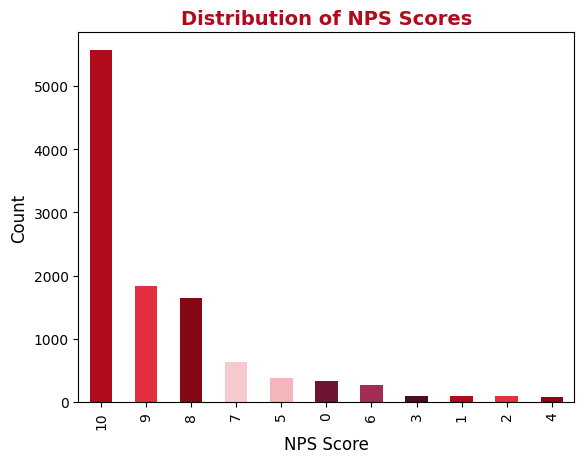

In [27]:
# Plot the chart
nps_distribution.plot(kind='bar', color=color_cycle[:len(nps_distribution)])
plt.title('Distribution of NPS Scores', fontsize=14, fontweight='bold', color='#B00B1C')  # CIBC Red for title
plt.xlabel('NPS Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# EXPLORE RELATIONSHIPS

Drop Client ID because it is only an identifier with unique variables - adding no value to identifying relationships.

In [28]:
# Drop the Client ID column
relationship_data = data.drop(columns=['Client ID'], errors='ignore')

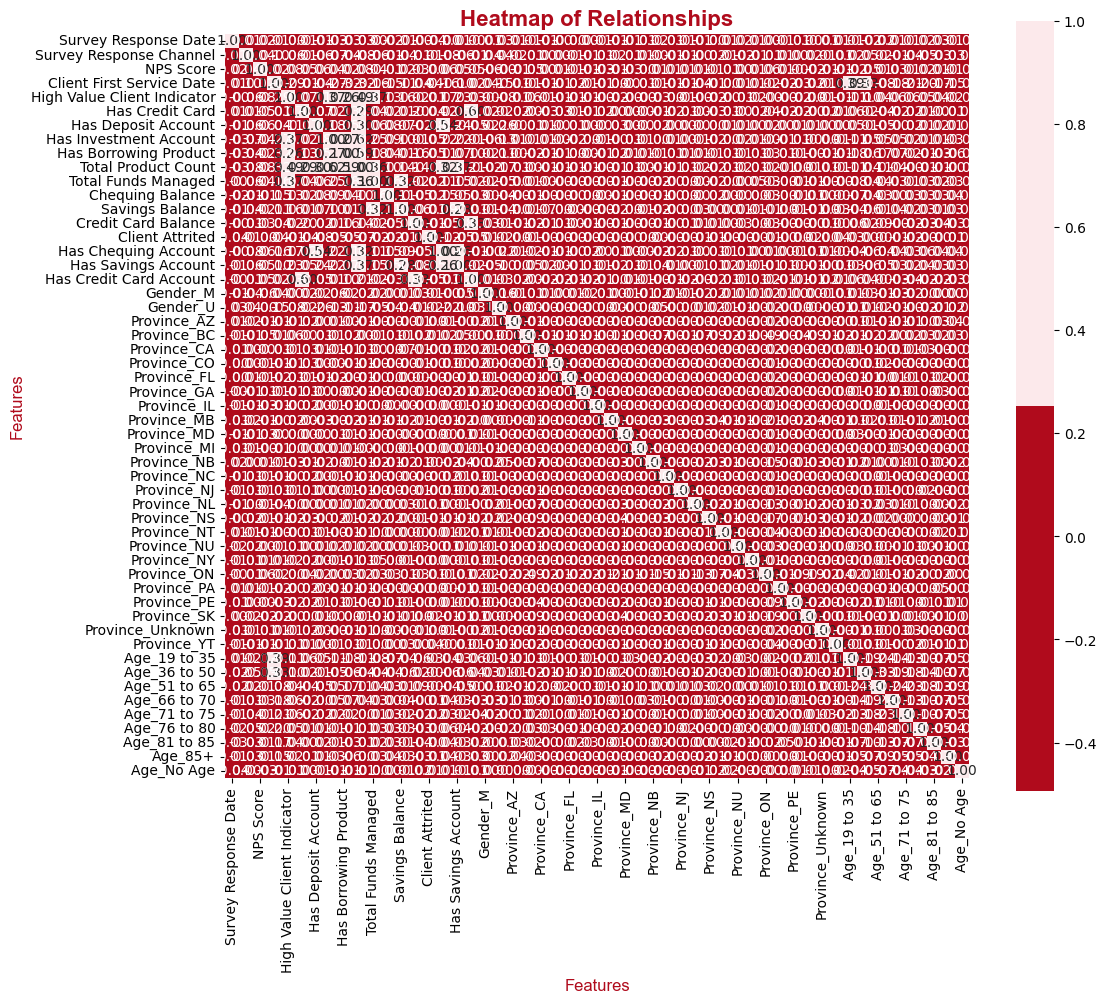

In [29]:
# Correlation matrix
correlation_matrix = relationship_data.corr()

plt.figure(figsize=(12, 10))
cibc_colors = ['#B00B1C', '#FCE9EB'] 

# Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True, 
    fmt=".2f",
    cmap=sns.color_palette(cibc_colors, as_cmap=True),
    cbar=True,
    square=True
)

# Set font style
font_properties = {'fontname': 'Arial', 'fontsize': 16, 'color': '#B00B1C', 'fontweight': 'bold'}

plt.title("Heatmap of Relationships", **font_properties)
plt.xlabel("Features", fontsize=12, color='#B00B1C', fontname='Arial')
plt.ylabel("Features", fontsize=12, color='#B00B1C', fontname='Arial')


plt.show()

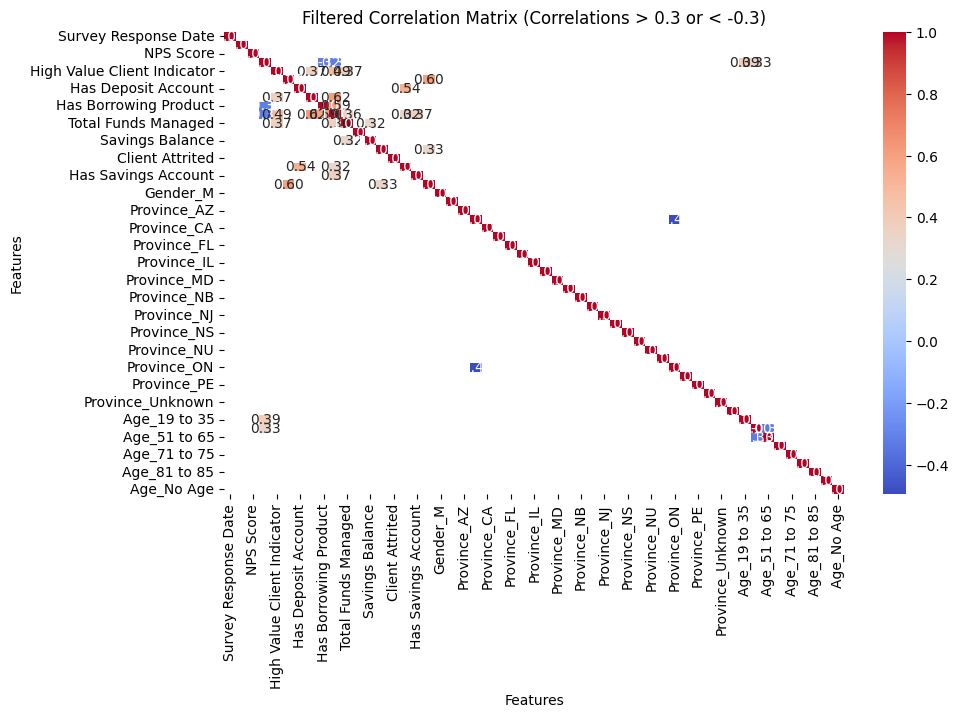

In [30]:
# Define the correlation threshold
corr_threshold = 0.3

# Filter the correlation matrix to include only values > 0.3 or < -0.3
strong_correlations = correlation_matrix[(correlation_matrix > corr_threshold) | (correlation_matrix < -corr_threshold)]

# Drop rows and columns where all values are NaN (features with no strong correlations)
filtered_corr_matrix = strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Visualize the filtered correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add titles and labels
plt.title('Filtered Correlation Matrix (Correlations > 0.3 or < -0.3)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

This is not clear. We filter the columns of interest based on features with high correlation with NPS score.

In [31]:
import statsmodels.api as sm
from sklearn import linear_model as lm

In [32]:
# For the 'Client First Service Date' column
first_service_date = data['Client First Service Date'].min()
last_service_date = data['Client First Service Date'].max()

print(f"First Client Service Date: {first_service_date}")
print(f"Last Client Service Date: {last_service_date}")

# For the 'Survey Response Date' column
first_survey_date = data['Survey Response Date'].min()
last_survey_date = data['Survey Response Date'].max()

print(f"First Survey Response Date: {first_survey_date}")
print(f"Last Survey Response Date: {last_survey_date}")

First Client Service Date: 1968-01-04 00:00:00
Last Client Service Date: 2024-01-31 00:00:00
First Survey Response Date: 2023-09-20 00:00:00
Last Survey Response Date: 2024-08-28 00:00:00


In [33]:
#Create two new numerical columns to replace date columns ( Survey Response Date and Client First Service Date)

# Define the final date (October 31, 2024)
final_date = pd.to_datetime("2024-10-31")

# Calculate the length as a client (considering churn status)
def calculate_length_as_client(row):
    # If the client has churned, use the survey date; otherwise, use the final date
    end_date = row['Survey Response Date'] if row['Client Attrited'] == 1 else final_date
    return (end_date - row['Client First Service Date']).days / 365.25  # Convert to years

# Calculate the time since survey date
def calculate_time_since_survey(row):
    return (final_date - row['Survey Response Date']).days / 365.25  # Convert to years

# Apply the calculations
relationship_data['Length as Client (Years)'] = relationship_data.apply(calculate_length_as_client, axis=1)
relationship_data['Time Since Survey Date (Years)'] = relationship_data.apply(calculate_time_since_survey, axis=1)

# Display the updated DataFrame
relationship_data.head()

,Survey Response Date,Survey Response Channel,NPS Score,Client First Service Date,High Value Client Indicator,Has Credit Card,Has Deposit Account,Has Investment Account,Has Borrowing Product,Total Product Count,...,Age_36 to 50,Age_51 to 65,Age_66 to 70,Age_71 to 75,Age_76 to 80,Age_81 to 85,Age_85+,Age_No Age,Length as Client (Years),Time Since Survey Date (Years)
0,2024-02-25,1,0,1985-01-17,0,0,1,0,1,4,...,0,1,0,0,0,0,0,0,39.786448,0.681725
1,2024-01-24,0,9,1988-01-26,0,1,1,1,1,7,...,0,1,0,0,0,0,0,0,36.763860,0.769336
2,2024-05-22,0,9,2019-01-13,0,1,1,0,0,3,...,0,0,0,0,0,0,0,0,5.798768,0.443532
3,2023-12-08,1,10,1998-01-03,0,1,1,0,1,4,...,1,0,0,0,0,0,0,0,26.825462,0.898015
4,2024-07-29,1,8,1987-01-08,0,1,1,0,0,4,...,0,0,0,0,0,1,0,0,37.812457,0.257358


In [34]:
# Exclude date columns for correlation analysis or visualizations
numeric_data = relationship_data.drop(columns=['Survey Response Date', 'Client First Service Date'])

In [35]:
# Filter columns related to NPS Score
corr_matrix = numeric_data.corr()
target_corr = corr_matrix['NPS Score'].sort_values(ascending=False)
selected_features = target_corr[target_corr.abs() > 0.2].index

# Subset the correlation matrix
filtered_corr_matrix = corr_matrix.loc[selected_features, selected_features]

C:\Users\tauny\AppData\Local\Temp\ipykernel_13012\3804665598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=target_corr.index, x=target_corr.values, palette="Reds")


Text(0, 0.5, 'Features')

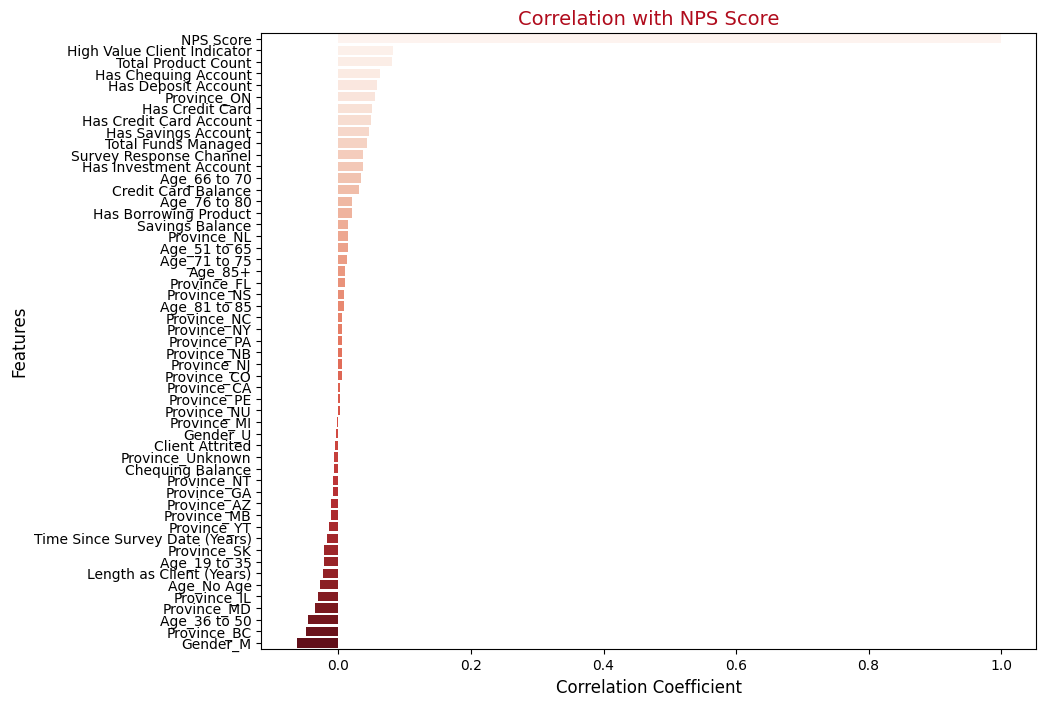

In [36]:
plt.figure(figsize=(10, 8))
sns.barplot(y=target_corr.index, x=target_corr.values, palette="Reds")
plt.title("Correlation with NPS Score", fontsize=14, color='#B00B1C')
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)

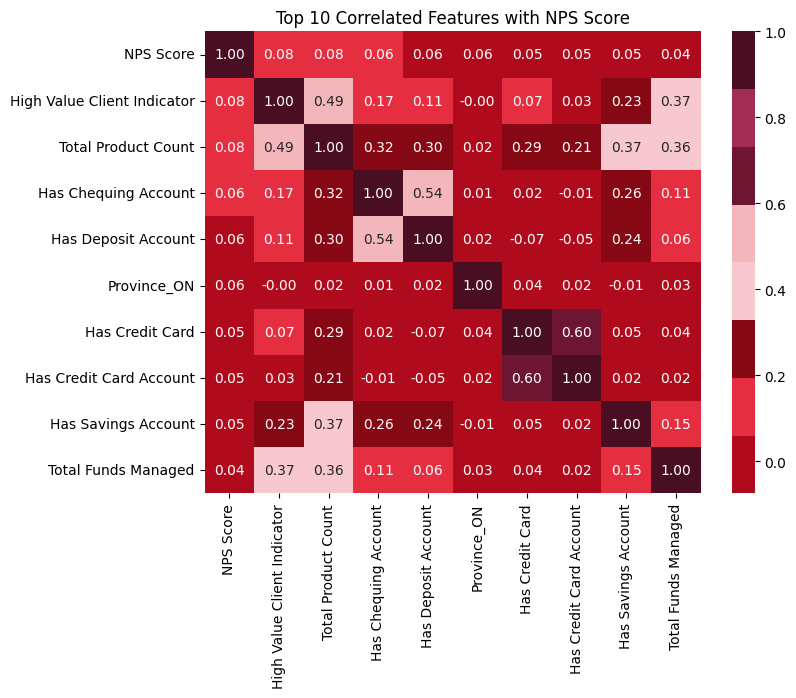

In [ ]:
# Correlation matrix for top 10 correlated variables with NPS Score
corr = numeric_data.corr()['NPS Score'].sort_values(ascending=False).head(10)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data[corr.index].corr(), annot=True, cmap=cibc_red, fmt='.2f')
plt.title('Top 10 Correlated Features with NPS Score')
plt.show()

In [38]:
# Define independent variables (drop irrelevant columns)
X = numeric_data.drop(columns='NPS Score')

# Define target variable (NPS Score)
y = numeric_data['NPS Score']

In [39]:
print(X.dtypes)
print(y.dtypes)

Survey Response Channel             int64
High Value Client Indicator         int64
Has Credit Card                     int64
Has Deposit Account                 int64
Has Investment Account              int64
Has Borrowing Product               int64
Total Product Count                 int64
Total Funds Managed               float64
Chequing Balance                  float64
Savings Balance                   float64
Credit Card Balance               float64
Client Attrited                     int64
Has Chequing Account                int64
Has Savings Account                 int64
Has Credit Card Account             int64
Gender_M                            int64
Gender_U                            int64
Province_AZ                         int64
Province_BC                         int64
Province_CA                         int64
Province_CO                         int64
Province_FL                         int64
Province_GA                         int64
Province_IL                       

In [40]:
# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model_reg = sm.OLS(y, X).fit()

# Print the summary of results
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              NPS Score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.836
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.05e-74
Time:                        22:18:15   Log-Likelihood:                -24723.
No. Observations:               11044   AIC:                         4.955e+04
Df Residuals:                   10991   BIC:                         4.994e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

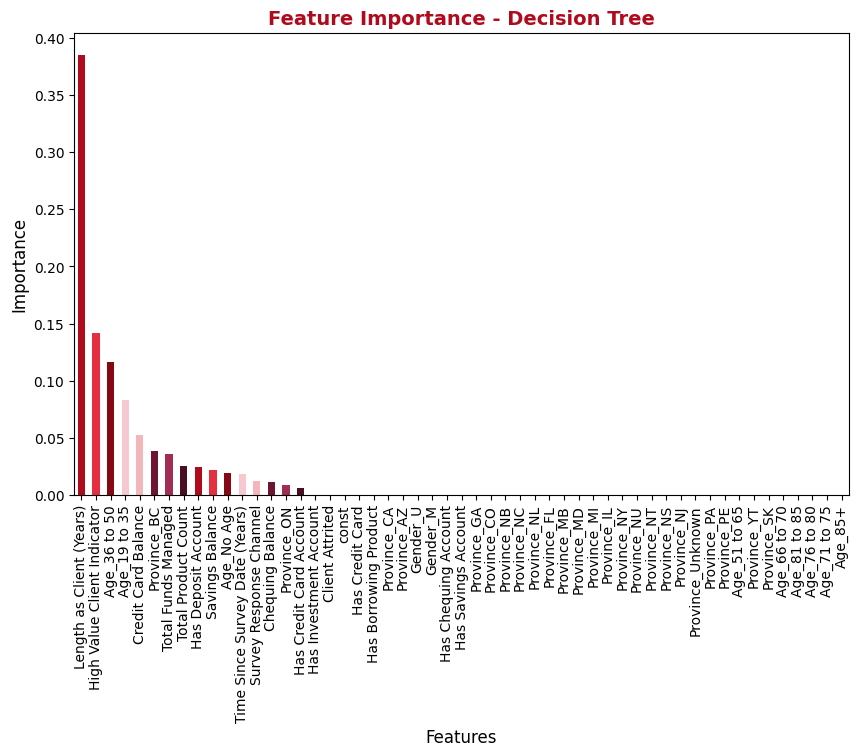

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_model.fit(X, y)

# Plot feature importance
importance = tree_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color=cibc_palette)
plt.title('Feature Importance - Decision Tree', color='#B00B1C', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

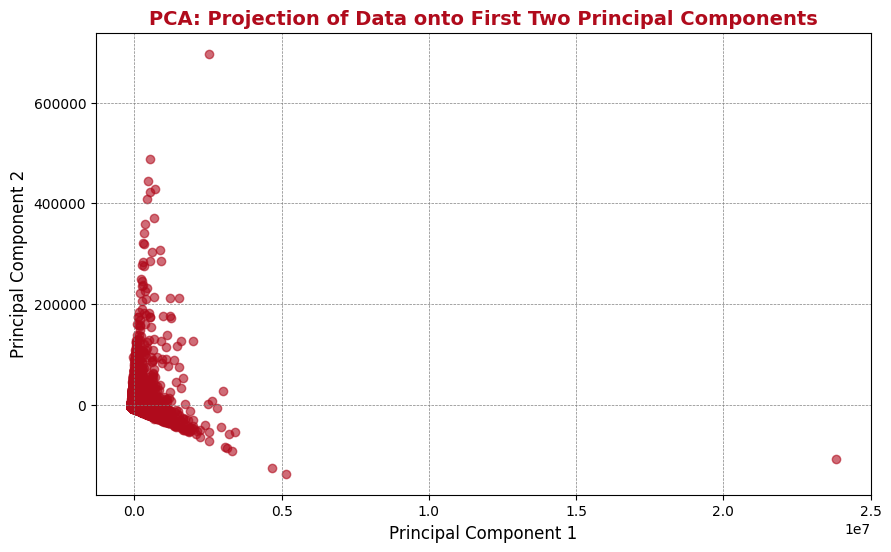

In [43]:
# Convert the principal components into a DataFrame for easier visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, color='#B00B1C')
plt.title('PCA: Projection of Data onto First Two Principal Components', color='#B00B1C', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [44]:
# Get the PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['Principal Component 1', 'Principal Component 2'],
                        index=numeric_data.columns)

# Display the loadings
print(loadings)

                                Principal Component 1  Principal Component 2
Survey Response Channel                 -8.459159e-08          -4.704281e-07
NPS Score                                2.958434e-07          -1.249835e-07
High Value Client Indicator              4.328549e-07           8.393668e-07
Has Credit Card                          4.044847e-08          -3.837643e-08
Has Deposit Account                      4.496700e-08           6.077800e-07
Has Investment Account                   3.617657e-07           5.807789e-07
Has Borrowing Product                    2.646543e-07          -8.993133e-07
Total Product Count                      2.745412e-06           3.671950e-06
Total Funds Managed                      9.996643e-01          -2.542453e-02
Chequing Balance                         9.478541e-03           1.823968e-01
Savings Balance                          2.411171e-02           9.826609e-01
Credit Card Balance                      3.020131e-04          -2.150722e-02

In [45]:
# Create a DataFrame of PCA components
pca_components = pd.DataFrame(pca.components_.T, index=numeric_data.columns, 
                              columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)])

# Define a function to display top 10 positive and negative features, sorted by absolute values
def print_top_features_sorted(pca_df, component):
    sorted_features = pca_df[component].abs().sort_values(ascending=False)
    print(f"\nTop 10 features (by absolute impact) on {component}:")
    print(sorted_features.head(10))

    print(f"\nTop 10 features positively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nlargest(10))

    print(f"\nTop 10 features negatively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nsmallest(10))

# Print top features for each component
for component in pca_components.columns:
    print_top_features_sorted(pca_components, component)


Top 10 features (by absolute impact) on Principal Component 1:
Total Funds Managed            9.996643e-01
Savings Balance                2.411171e-02
Chequing Balance               9.478541e-03
Credit Card Balance            3.020131e-04
Length as Client (Years)       7.093763e-06
Total Product Count            2.745412e-06
High Value Client Indicator    4.328549e-07
Has Investment Account         3.617657e-07
NPS Score                      2.958434e-07
Has Borrowing Product          2.646543e-07
Name: Principal Component 1, dtype: float64

Top 10 features positively affecting Principal Component 1:
Total Funds Managed            9.996643e-01
Savings Balance                2.411171e-02
Chequing Balance               9.478541e-03
Credit Card Balance            3.020131e-04
Length as Client (Years)       7.093763e-06
Total Product Count            2.745412e-06
High Value Client Indicator    4.328549e-07
Has Investment Account         3.617657e-07
NPS Score                      2.958434

In [46]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total explained variance by PC1 and PC2: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.99
Explained variance by PC2: 0.00
Total explained variance by PC1 and PC2: 1.00


Try on PCA scaled data and compare results.

In [47]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [48]:
scaled_principal_components = pca.fit_transform(scaled_data)

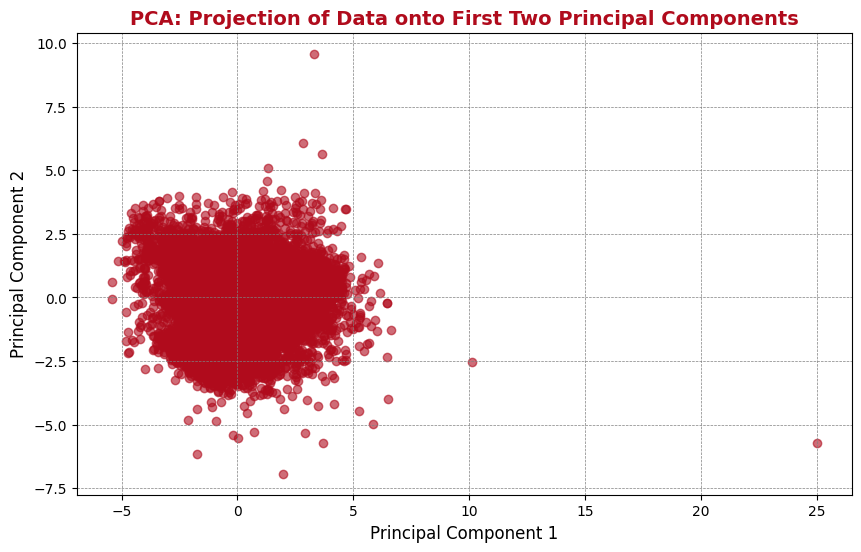

In [49]:
# Convert the principal components into a DataFrame for easier visualization
pca_df = pd.DataFrame(data=scaled_principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, color='#B00B1C')
plt.title('PCA: Projection of Data onto First Two Principal Components', color='#B00B1C', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

Feature Loadings (Relationship between original features and principal components):
                                Principal Component 1  Principal Component 2
Survey Response Channel                     -0.084280               0.054812
NPS Score                                    0.059485               0.053252
High Value Client Indicator                  0.333736              -0.007167
Has Credit Card                              0.102643               0.495960
Has Deposit Account                          0.209172              -0.198117
Has Investment Account                       0.343155              -0.012417
Has Borrowing Product                        0.294304               0.192604
Total Product Count                          0.449138               0.173265
Total Funds Managed                          0.264371              -0.015415
Chequing Balance                             0.132997              -0.106124
Savings Balance                              0.167054              -0

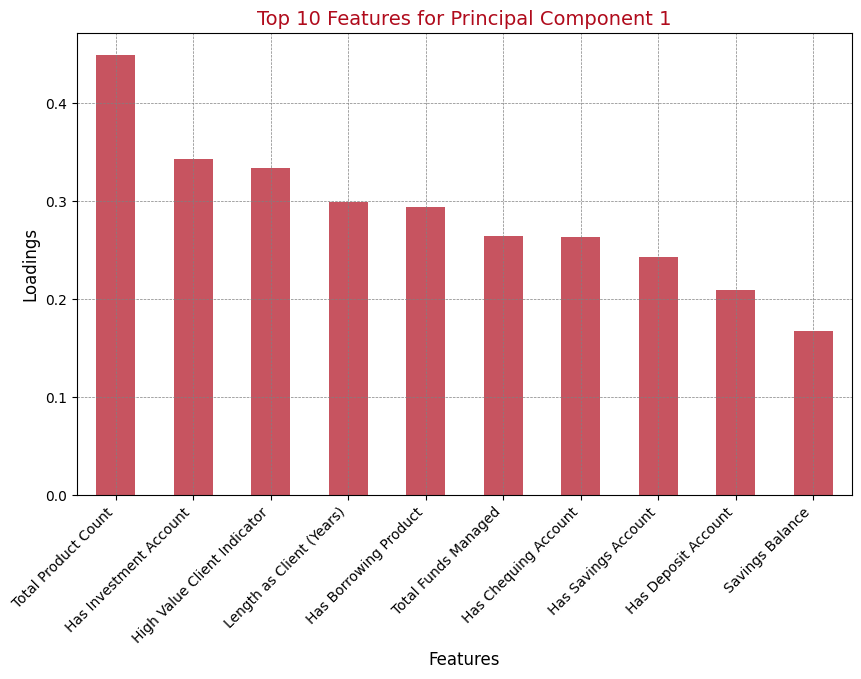

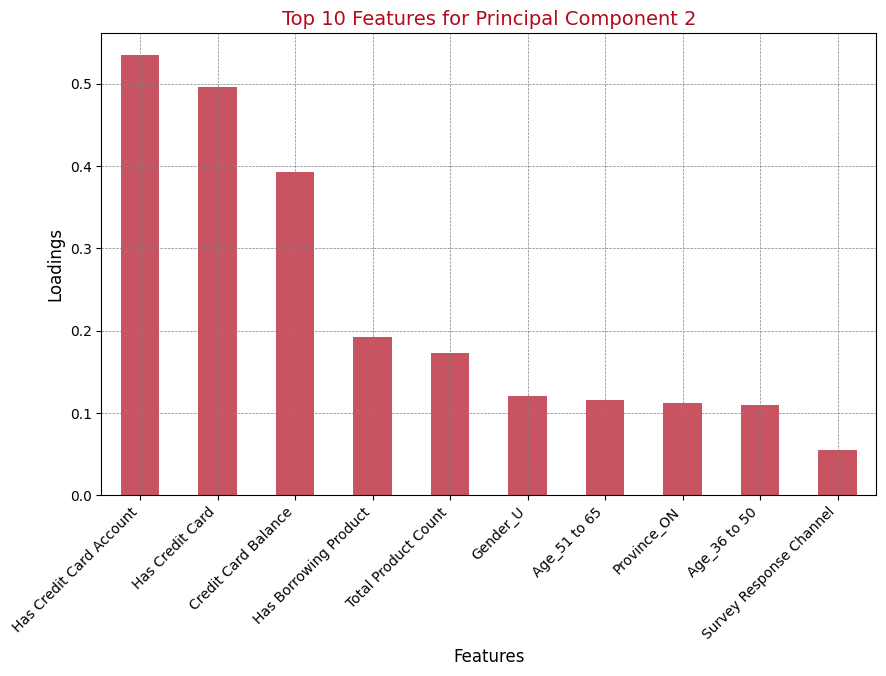

In [50]:
# Extract the loadings
loadings = pd.DataFrame(
    data=pca.components_.T,  
    index=numeric_data.columns,  # Original feature names
    columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)]  # Name components
)

# Display the loadings for each principal component
print("Feature Loadings (Relationship between original features and principal components):")
print(loadings)

# Visualize the top features contributing to each component
def plot_top_loadings(loadings, component, top_n=10):
    sorted_loadings = loadings[component].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sorted_loadings[:top_n].plot(kind='bar', color='#B00B1C', alpha=0.7)
    plt.title(f'Top {top_n} Features for {component}', fontsize=14, color='#B00B1C')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Loadings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Plot top 10 features for the first two principal components
plot_top_loadings(loadings, 'Principal Component 1', top_n=10)
plot_top_loadings(loadings, 'Principal Component 2', top_n=10)

In [51]:
# Create a DataFrame of PCA components
pca_components = pd.DataFrame(pca.components_.T, index=numeric_data.columns, 
                              columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)])

# Define a function to display top 10 positive and negative features, sorted by absolute values
def print_top_features_sorted(pca_df, component):
    sorted_features = pca_df[component].abs().sort_values(ascending=False)
    print(f"\nTop 10 features (by absolute impact) on {component}:")
    print(sorted_features.head(10))

    print(f"\nTop 10 features positively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nlargest(10))

    print(f"\nTop 10 features negatively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nsmallest(10))

# Print top features for each component
for component in pca_components.columns:
    print_top_features_sorted(pca_components, component)


Top 10 features (by absolute impact) on Principal Component 1:
Total Product Count            0.449138
Has Investment Account         0.343155
High Value Client Indicator    0.333736
Length as Client (Years)       0.298999
Has Borrowing Product          0.294304
Total Funds Managed            0.264371
Has Chequing Account           0.263635
Has Savings Account            0.243235
Has Deposit Account            0.209172
Savings Balance                0.167054
Name: Principal Component 1, dtype: float64

Top 10 features positively affecting Principal Component 1:
Total Product Count            0.449138
Has Investment Account         0.343155
High Value Client Indicator    0.333736
Length as Client (Years)       0.298999
Has Borrowing Product          0.294304
Total Funds Managed            0.264371
Has Chequing Account           0.263635
Has Savings Account            0.243235
Has Deposit Account            0.209172
Savings Balance                0.167054
Name: Principal Component 1, dt

In [52]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total explained variance by PC1 and PC2: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.07
Explained variance by PC2: 0.04
Total explained variance by PC1 and PC2: 0.10


Scaled data is showing results more representative of the relationship between featuers and their variances.

In [53]:
# Apply PCA and reduce to 2 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

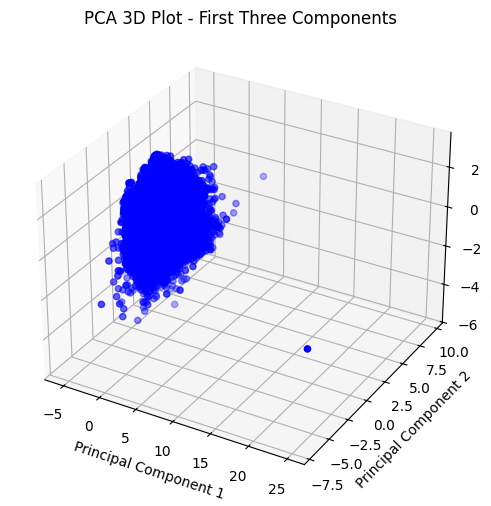

In [54]:
# Create a 3D plot of the three components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3 components
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c='b', marker='o')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA 3D Plot - First Three Components')

plt.show()

In [55]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total explained variance by PC1 and PC2: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.07
Explained variance by PC2: 0.04
Total explained variance by PC1 and PC2: 0.14


Explained variance by Principal Component 1: 0.07
Explained variance by Principal Component 2: 0.04
Explained variance by Principal Component 3: 0.03
Explained variance by Principal Component 4: 0.03
Explained variance by Principal Component 5: 0.03
Explained variance by Principal Component 6: 0.03
Explained variance by Principal Component 7: 0.02
Explained variance by Principal Component 8: 0.02
Total explained variance by the first 8 components: 0.27


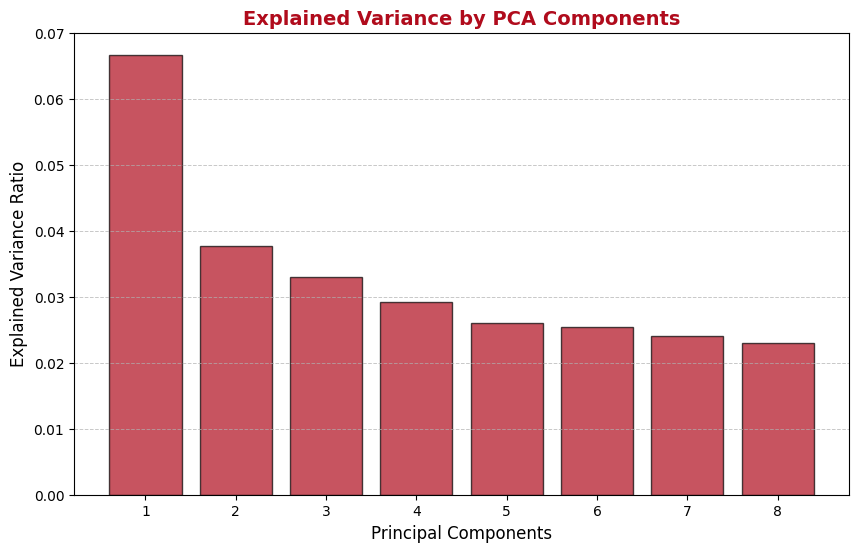


PCA Components:
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.721626              -1.795753              -1.569277   
1               1.928443              -1.023195              -0.958959   
2              -1.876266               0.829921               1.386024   
3              -0.599628               1.430801               0.808175   
4              -0.865383              -0.342965              -0.718454   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0               2.012555               1.876557              -0.552860   
1              -1.070518               1.496301               0.167733   
2              -1.241394               0.057956              -0.561540   
3               0.964729               0.163648              -0.749547   
4              -1.187438              -1.030480              -2.073089   

   Principal Component 7  Principal Component 8  
0              -0.257620               0.74

In [56]:
# Perform PCA, keeping 8 components
pca = PCA(n_components=8)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=[f'Principal Component {i+1}' for i in range(8)])

# Print explained variance for the first 8 components
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance, start=1):
    print(f'Explained variance by Principal Component {i}: {variance:.2f}')

# Total explained variance
total_explained_variance = np.sum(explained_variance)
print(f'Total explained variance by the first 8 components: {total_explained_variance:.2f}')

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 9), explained_variance, alpha=0.7, color='#B00B1C', edgecolor='black')
plt.title('Explained Variance by PCA Components', fontsize=14, fontweight='bold', color='#B00B1C')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, 9))
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Output the PCA components
print("\nPCA Components:")
print(pca_df.head())

PCA desn't capture enough of the varuation, only 27% of the total variance is captured within the first 8 components.

We try a random forest model because it can captures non-linear relationships.

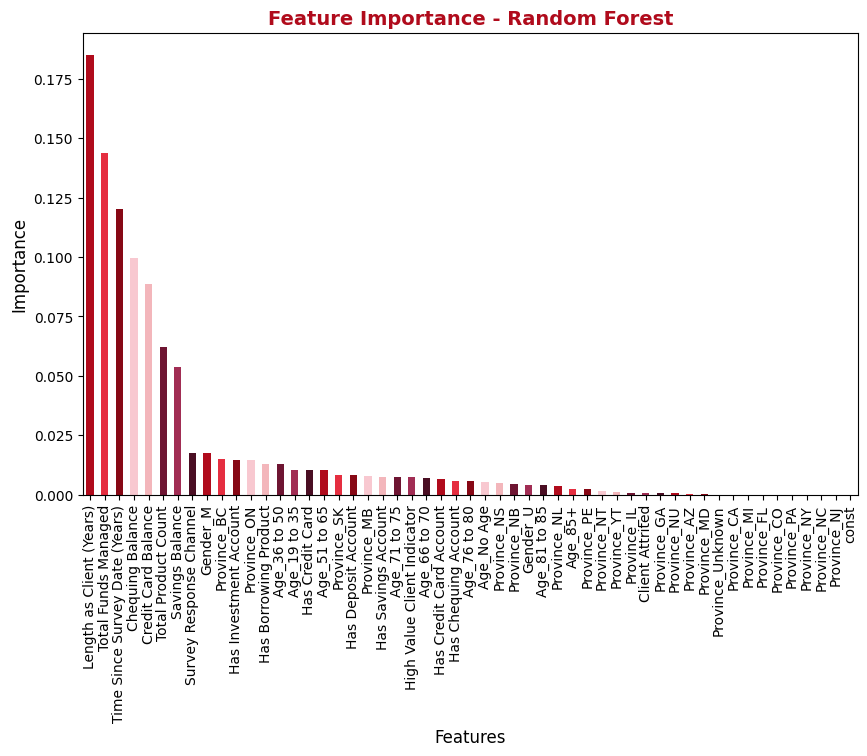

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Plot feature importance
importance = rf_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color=cibc_palette)
plt.title('Feature Importance - Random Forest', color='#B00B1C', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()

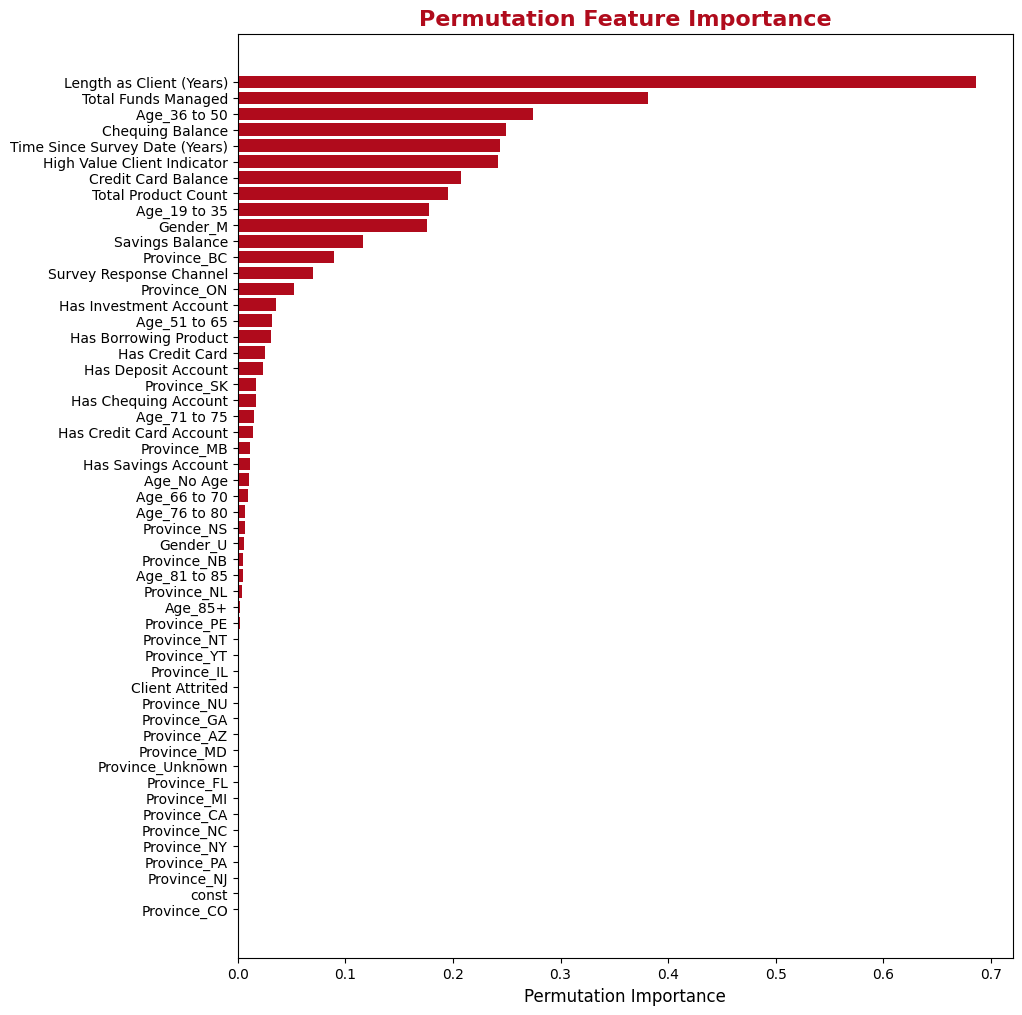

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)


importance_df = pd.DataFrame({
    'Feature': X.columns,  # Extract feature names from X
    'Importance': perm_importance.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 12))  # Adjust figure size for better readability
plt.barh(importance_df['Feature'], importance_df['Importance'], color=cibc_palette)
plt.title('Permutation Feature Importance', fontsize=16, fontweight='bold', color='#B00B1C')
plt.xlabel('Permutation Importance', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

In [68]:
# Scale the independent variables
X_scaled = scaler.fit_transform(X)

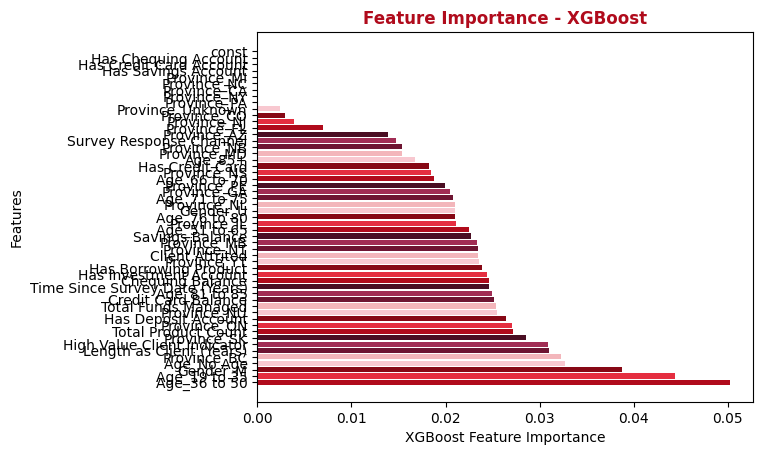

In [69]:
from xgboost import XGBRegressor

# Fit XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X, y)

# Plot feature importance
xgb_importances = xgb_model.feature_importances_
sorted_idx = xgb_importances.argsort()[::-1]
plt.barh(X.columns[sorted_idx], xgb_importances[sorted_idx], color= cibc_palette)
plt.xlabel('XGBoost Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost', color='#B00B1C', fontweight='bold')
plt.show()

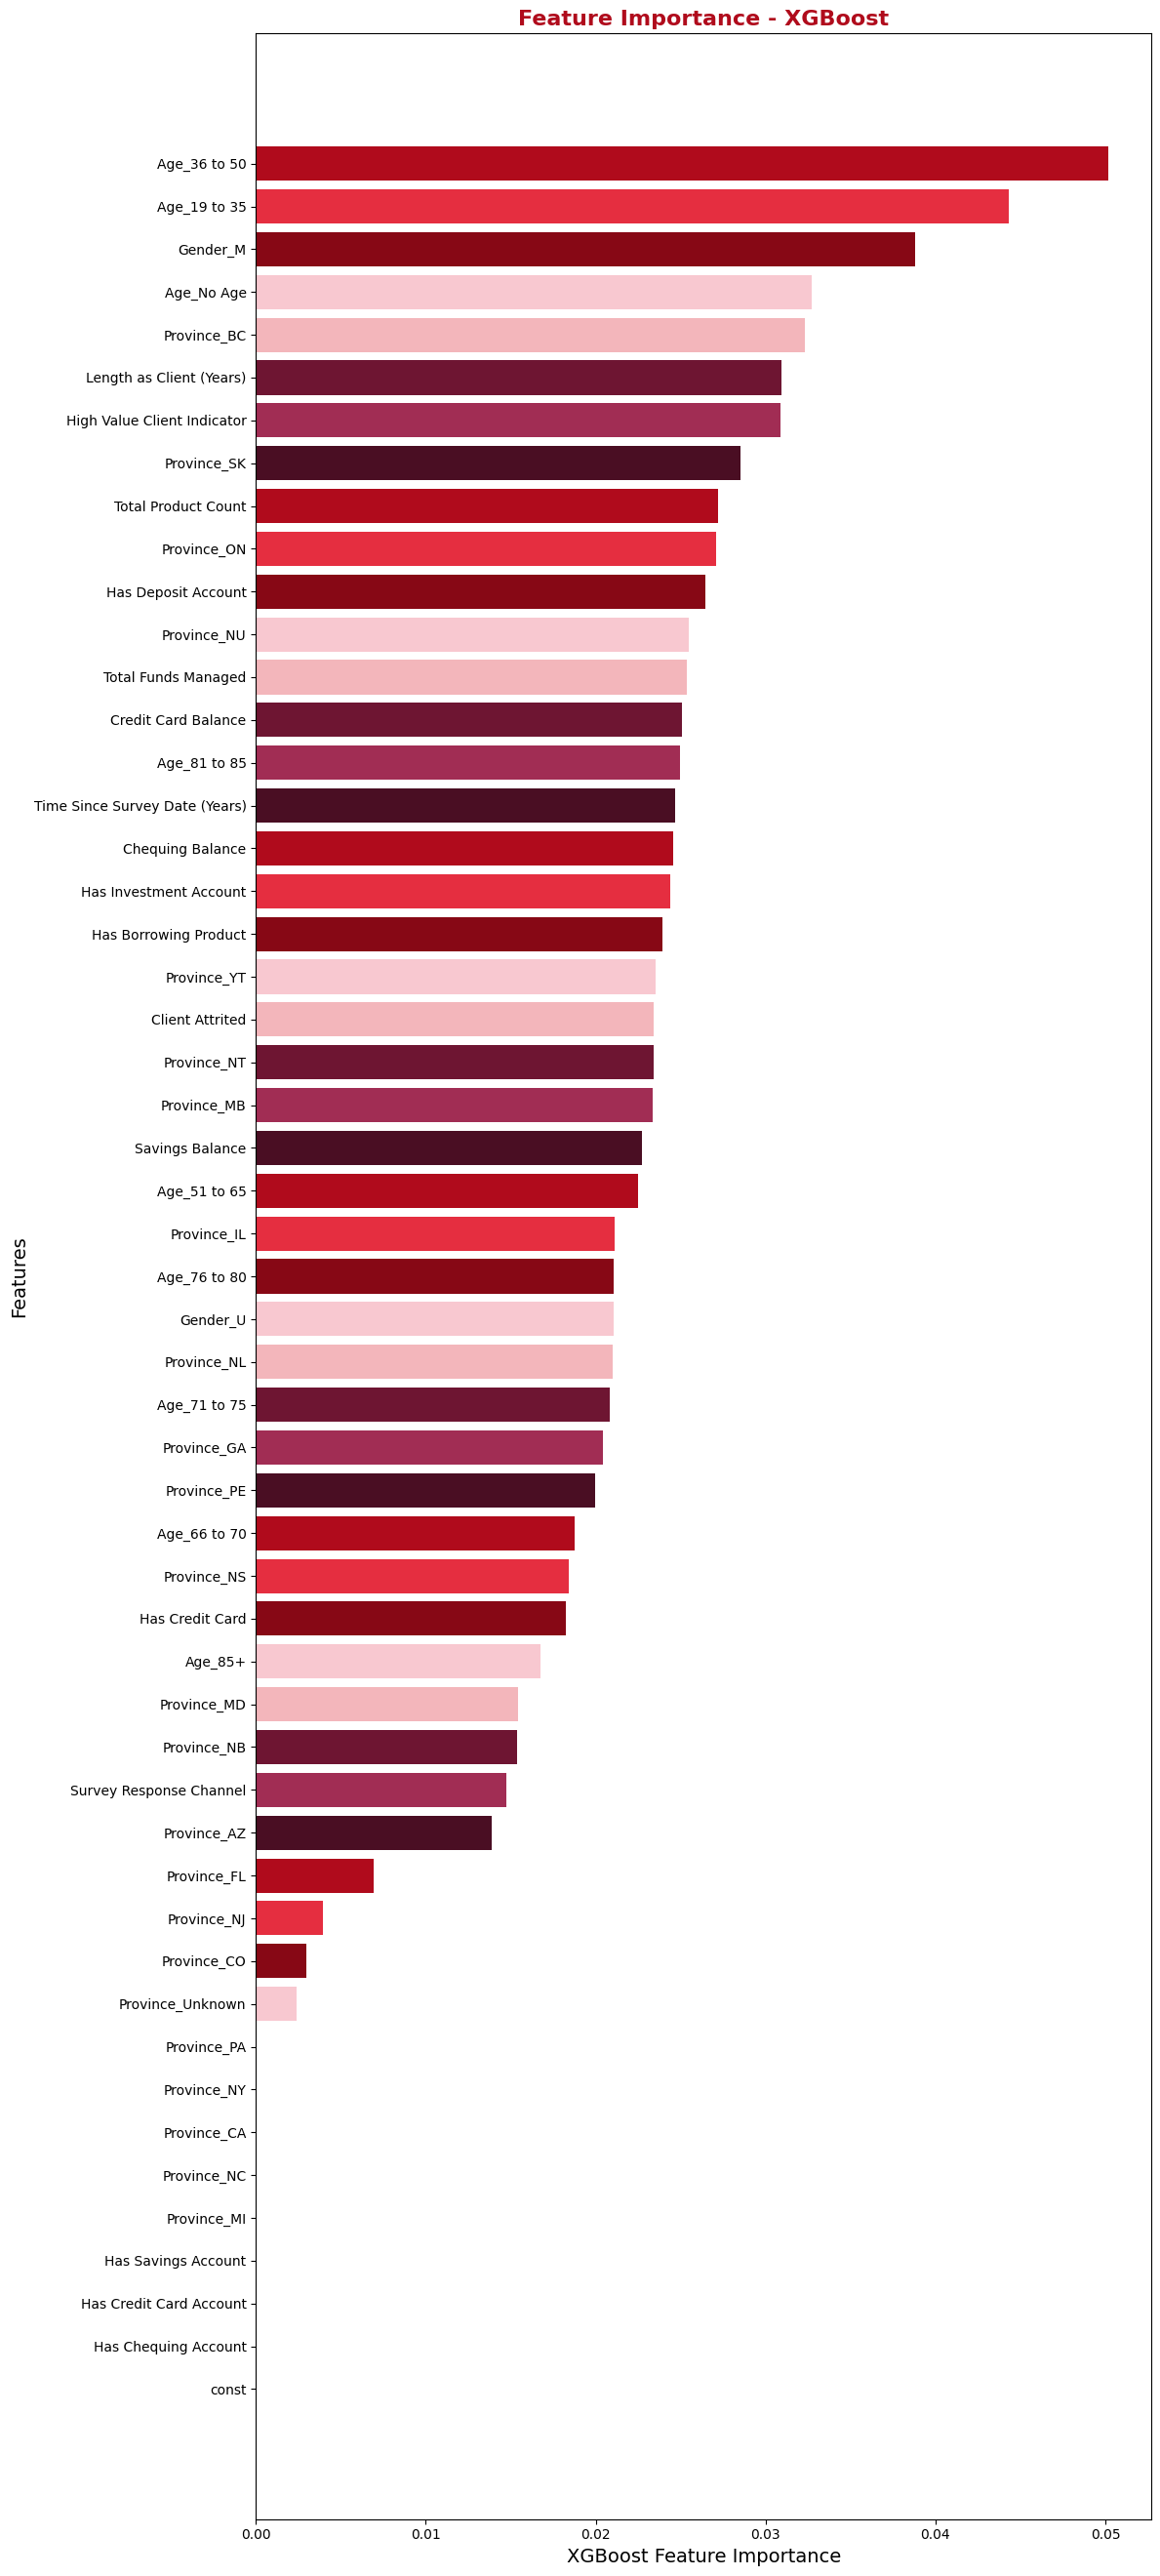

In [65]:
# Adjust figure size for better readability
plt.figure(figsize=(12, len(X.columns) / 2))  
plt.barh(X.columns[sorted_idx], xgb_importances[sorted_idx], color=cibc_palette)
plt.xlabel('XGBoost Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - XGBoost', color='#B00B1C', fontweight='bold', fontsize=16)

# Invert y-axis to show the most important features on top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout() 
plt.show()

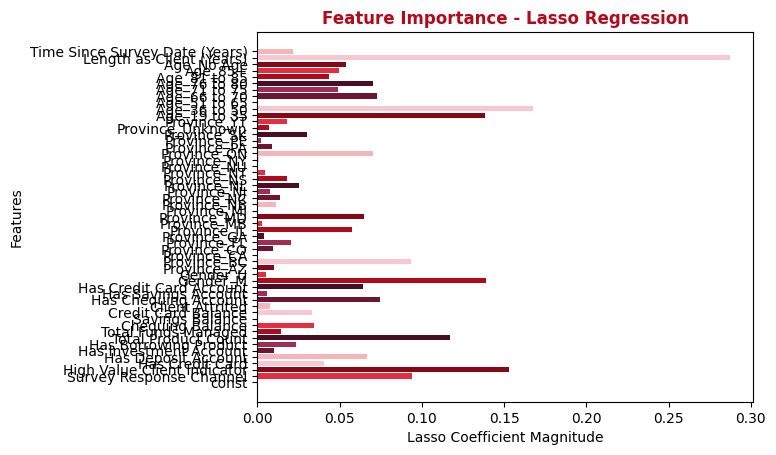

In [70]:
from sklearn.linear_model import LassoCV

# Fit Lasso model
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Plot feature importance
plt.barh(X.columns, np.abs(lasso.coef_), color=cibc_palette)
plt.xlabel('Lasso Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance - Lasso Regression', color='#B00B1C', fontweight='bold')
plt.show()

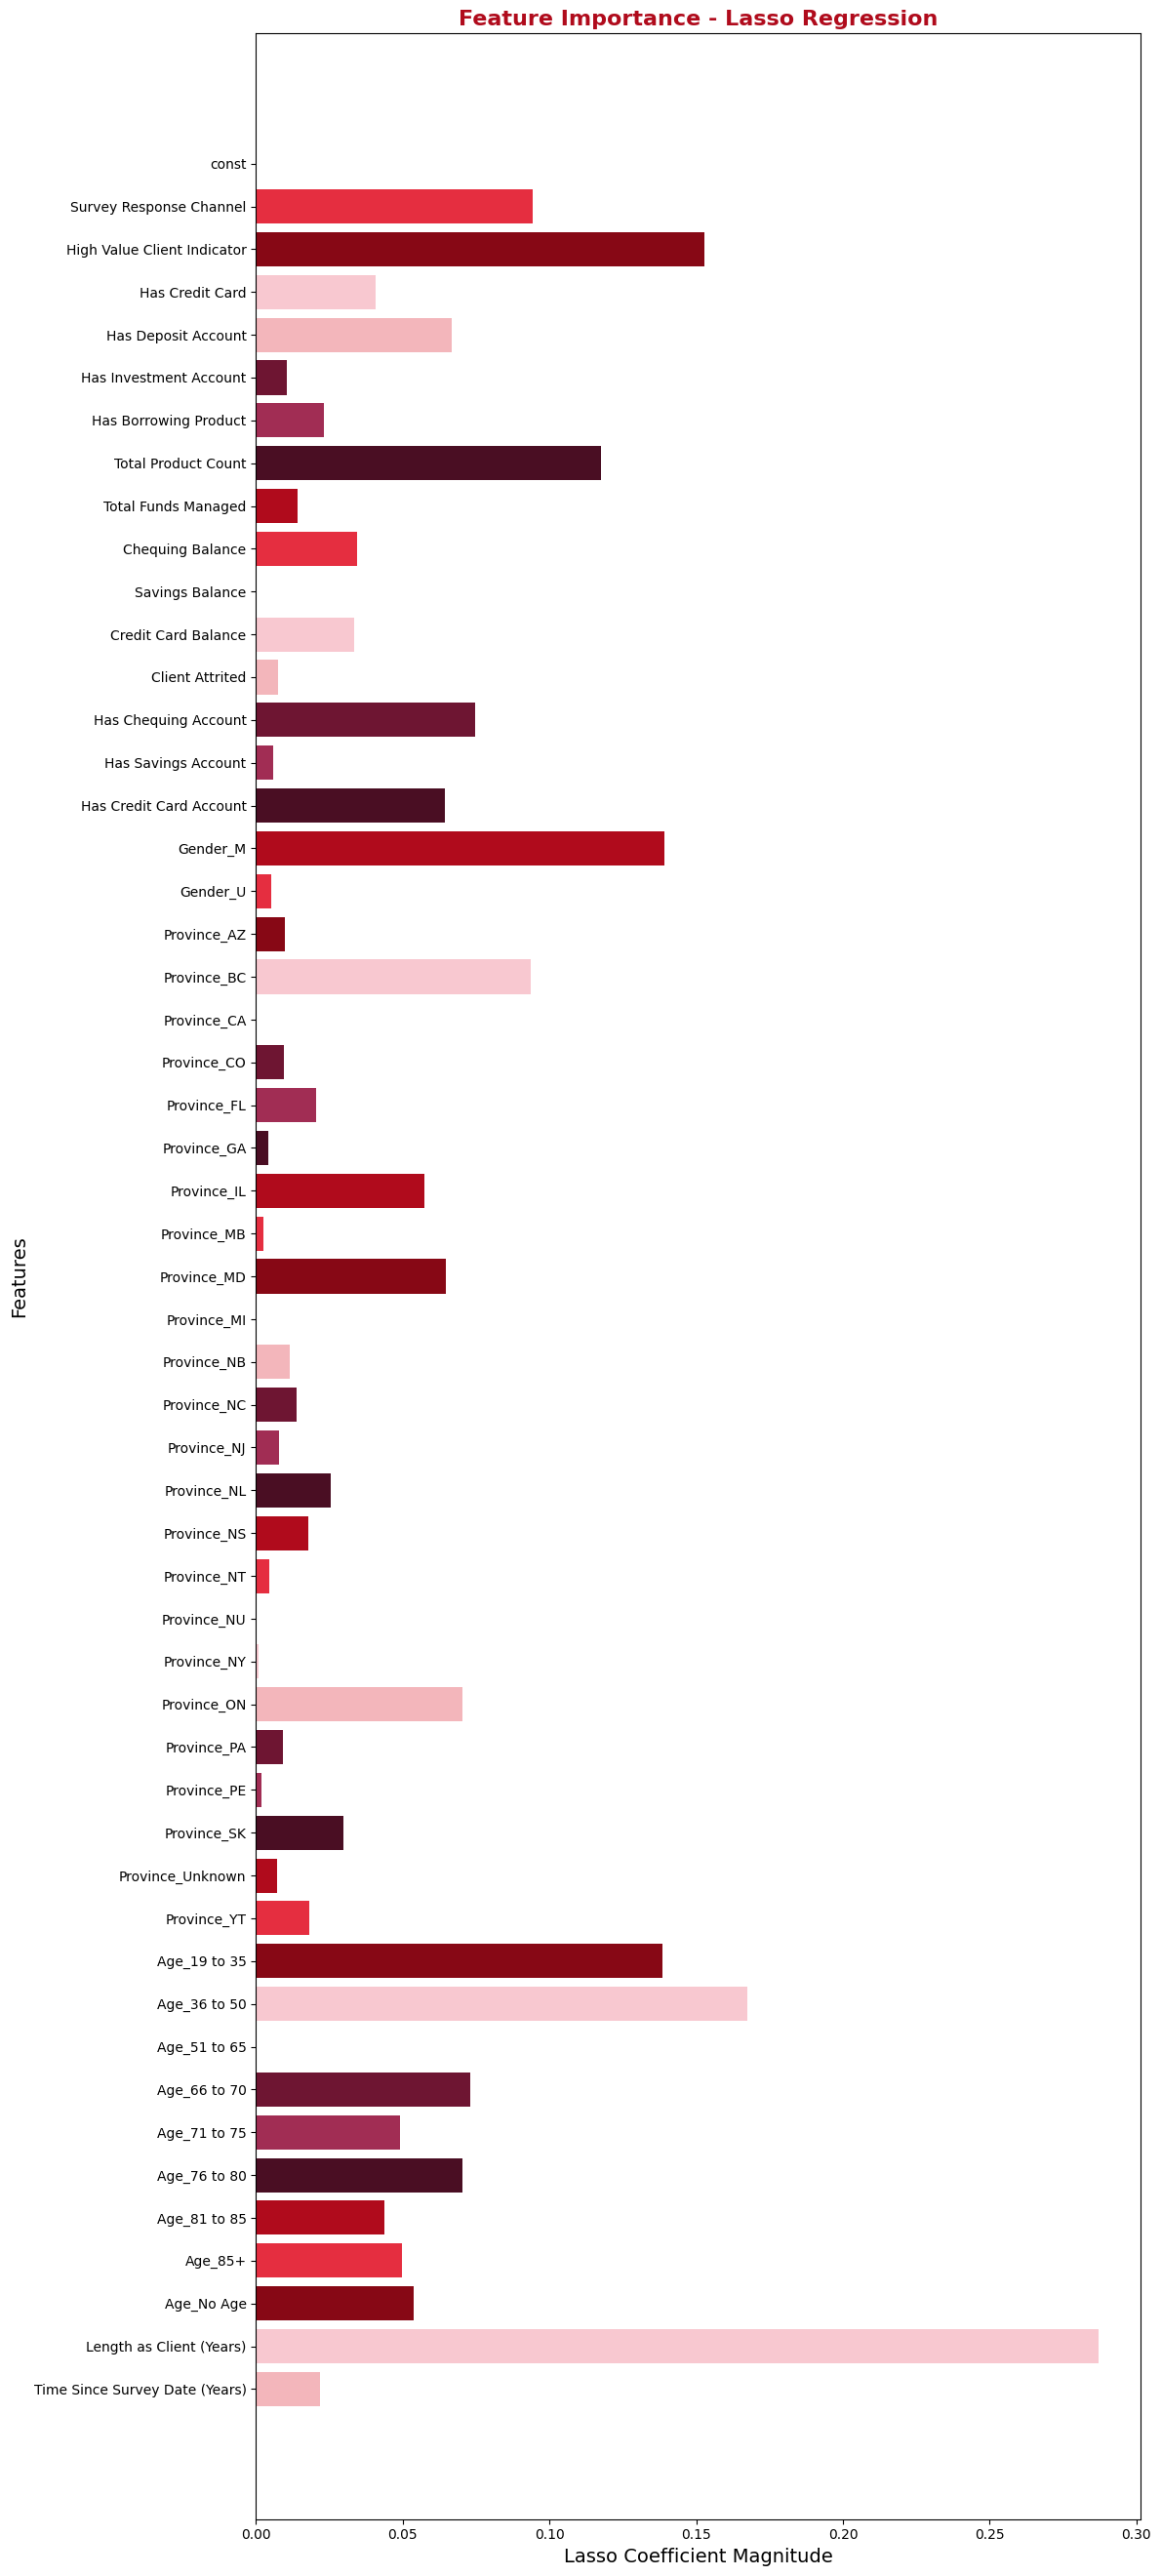

In [72]:
# Adjust figure size dynamically for better readability
plt.figure(figsize=(12, len(X.columns) / 2))

# Plot feature importance
plt.barh(X.columns, np.abs(lasso.coef_), color=cibc_palette)
plt.xlabel('Lasso Coefficient Magnitude', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Lasso Regression', color='#B00B1C', fontweight='bold', fontsize=16)

# Invert y-axis to show the most important features on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [61]:
print(numeric_data[['Length as Client (Years)', 'NPS Score']].corr())

                          Length as Client (Years)  NPS Score
Length as Client (Years)                  1.000000  -0.023193
NPS Score                                -0.023193   1.000000


In [76]:
# Convert scaled_data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Calculate the correlation
print(scaled_df[['Length as Client (Years)', 'NPS Score']].corr())

                          Length as Client (Years)  NPS Score
Length as Client (Years)                  1.000000  -0.023193
NPS Score                                -0.023193   1.000000


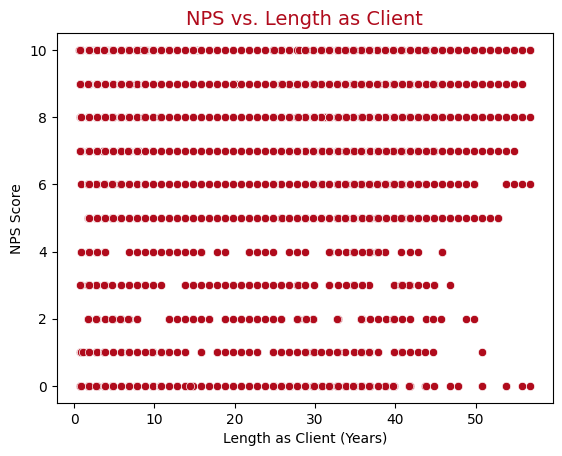

In [79]:
sns.scatterplot(data=numeric_data, x='Length as Client (Years)', y='NPS Score', color='#B00B1C')
plt.title('NPS vs. Length as Client', fontsize=14, color='#B00B1C')
plt.xlabel('Length as Client (Years)')
plt.ylabel('NPS Score')
plt.show()